In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from subs2vec.vecs import Vectors
from scipy.stats import rankdata
from sklearn.metrics.pairwise import cosine_similarity

## Generating `wordsims.js`, the source for the stimuli in the match-to-center game

In [2]:
# this requires having the fastText Common Crawl vectors, which can be downloaded from
# https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz
# and subs2vec, which can be install using
# pip install subs2vec
vecs = Vectors('../embeddings/cc.en.300.vec', normalize=True, n=2e5)
vecs_dict = vecs.as_dict()

[INFO] loading vectors ../embeddings/cc.en.300.vec
[INFO] <function Vectors.__init__ at 0x164857370> ran in 6.225 seconds
[INFO] <function Vectors.as_dict at 0x1648575b0> ran in 0.043 seconds


In [68]:
df = pd.read_csv('75_adjectives_animals_motionverbs.tsv', sep='\t')
df.prefix = df.prefix.astype(str).str.replace('nan', '')
df['stimulus'] = df.prefix + ' ' + df.en_wordform
df.stimulus = df.stimulus.str.lstrip(' ')
display(df)

,prefix,en_wordform,category,pos_gloss,stimulus
0,,bad,adjective,adjective,bad
1,,beautiful,adjective,adjective,beautiful
2,,cheap,adjective,adjective,cheap
3,,clever,adjective,adjective,clever
4,,deaf,adjective,adjective,deaf
...,...,...,...,...,...
70,to,swim,bodymotion,verb,to swim
71,to,walk,bodymotion,verb,to walk
72,to,lay,bodymotion,verb,to lay
73,to,sit,bodymotion,verb,to sit


In [69]:
words = df.en_wordform
words

0           bad
1     beautiful
2         cheap
3        clever
4          deaf
        ...    
70         swim
71         walk
72          lay
73          sit
74        stand
Name: en_wordform, Length: 75, dtype: object

In [70]:
wordvecs = [vecs_dict[word] for word in words]

In [71]:
cossims = cosine_similarity(wordvecs)

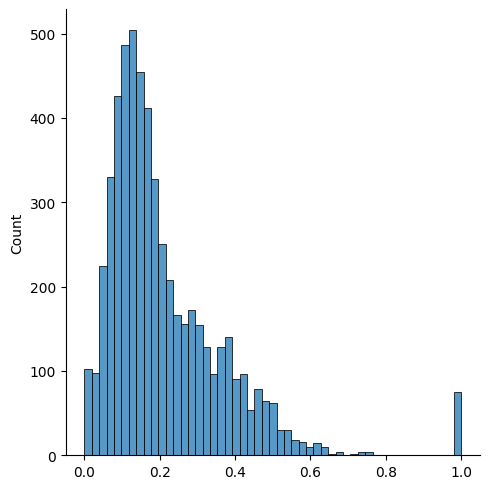

In [72]:
cossims.shape
cossims = np.clip(np.around(cossims, 3), 0, 1)
sns.displot(cossims.ravel())

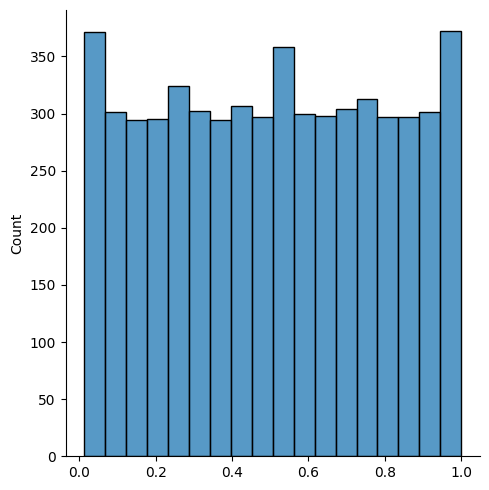

In [73]:
cossims[:] = [rankdata(row) / len(row) for row in cossims]
sns.displot(cossims.ravel())

In [74]:
text = f'''
export const words_sorted = ['{"', '".join(df.stimulus)}'];

export const cosines_sorted = [[{"], [".join([", ".join([str(x) for x in cossim]) for cossim in cossims])}]];
'''
print(text)


export const words_sorted = ['bad', 'beautiful', 'cheap', 'clever', 'deaf', 'empty', 'famous', 'fresh', 'full', 'gentle', 'good', 'last', 'naked', 'nasty', 'other', 'powerful', 'ripe', 'sad', 'sick', 'soft', 'strong', 'stupid', 'thick', 'thin', 'weak', 'a cat', 'a chicken', 'a cow', 'a crab', 'a crocodile', 'a crow', 'a dog', 'a dolphin', 'an elephant', 'a fish', 'a fox', 'a frog', 'a giraffe', 'a horse', 'a lion', 'a lizard', 'a mosquito', 'a mouse', 'a nest', 'an octopus', 'a pig', 'a pigeon', 'a rabbit', 'a rat', 'a seal', 'a snake', 'a spider', 'a squid', 'a squirrel', 'a tiger', 'a turtle', 'a whale', 'a wolf', 'a worm', 'a zebra', 'to carry', 'to hide', 'to climb', 'to crawl', 'to dance', 'to dive', 'to duck', 'to jump', 'to kick', 'to run', 'to swim', 'to walk', 'to lay', 'to sit', 'to stand'];

export const cosines_sorted = [[1.0, 0.8, 0.9066666666666666, 0.88, 0.41333333333333333, 0.5066666666666667, 0.5466666666666666, 0.8333333333333334, 0.10666666666666667, 0.64, 0.9866666

In [75]:
print(np.dot(vecs_dict['friendship'], vecs_dict['use']))
print(np.dot(vecs_dict['dog'], vecs_dict['cat']))
print(np.dot(vecs_dict['cereal'], vecs_dict['cornflakes']))

0.06761071603253604
0.7078641298542563
0.6715410217989706


In [76]:
print(np.dot(vecs_dict['powerful'], vecs_dict['arm']))
print(np.dot(vecs_dict['arm'], vecs_dict['gift']))
print(np.dot(vecs_dict['powerful'], vecs_dict['gift']))

0.13902873340882999
0.13124853000464454
0.17608271251137012


In [77]:
print(np.dot(vecs_dict['lose'], vecs_dict['ground']))
print(np.dot(vecs_dict['believe'], vecs_dict['ground']))
print(np.dot(vecs_dict['lose'], vecs_dict['believe']))

0.19750254827422647
0.10940259447678605
0.30113321430123174


In [78]:
with open('wordsims.js', 'w') as simsfile:
    simsfile.write(text)

In [79]:
np.savetxt('word_similarities.txt', cossims, fmt='%.6f')